<a href="https://colab.research.google.com/github/Manjiri1101/CMPE255-Manjiri/blob/main/Assignment4/Assignment4_frequent_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment : Frequent data Mining using apriori and fpgrowth
### Name: Manjiri Kadam 
### Student Id: 015312076
### Objective
> Write  colabs to demonstrate frequent pattern mining apriori and fpgrowth techniques

>refer to slides shared in the class for hints to colabs. https://docs.google.com/presentation/d/1d2Xh9NTpzhj0H1rz3LbdnmLMmkE6Yh2-NKMYHLQ-_bM/edit#slide=id.g1026212bcb8_0_180

 

> use any of popular libraries you can find 

# Dataset 🐾  : [Link](https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery) 
* I am making use of a bakery dataset, it has the items (food product sold by bakery), transaction Id, and Time information.

* I am using apyori for apriori frequent pattern mining. And fpgrowth from mlxtend library.

* Frequent Pattern mining is used to find out the association, correlation and dependency in the data.

Mounting the google drive to import the uploaded dataset. (csv file)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Installing the required libraries and packages for frequent mining

In [ ]:
!pip uninstall mlxtend
!pip install git+git://github.com/rasbt/mlxtend.git

Found existing installation: mlxtend 0.19.0
Uninstalling mlxtend-0.19.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/mlxtend-0.19.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/mlxtend/*
Proceed (y/n)? y
  Successfully uninstalled mlxtend-0.19.0
  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-z_utbpag
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-z_utbpag
  Created wheel for mlxtend: filename=mlxtend-0.20.0.dev0-py2.py3-none-any.whl size=1585378 sha256=279fb6a7824c479c7b6d4aae8182771d479dbffe98b09751e96867899afcb9c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-89nk7z5j/wheels/8c/d2/39/72837b351435c21adf9296330ca3783d4be80aec9dae8387d1
Successfully built mlxtend


In [ ]:
! pip install apyori
# !pip install mlxtend
!pip install fpgrowth-py
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 15.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
#Importing the required Python Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import linalg
import matplotlib as mpl
import itertools
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud # For visualization
# Using the mlxtend library
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
# Pattern mining
from apyori import apriori
from mlxtend.frequent_patterns import fpgrowth
from fpgrowth_py import fpgrowth

Reading the csv file in a dataframe

In [ ]:
#Read the dataset as a dataframe:
df = pd.read_csv('/content/gdrive/MyDrive/Data_Mining/Dataset/Bakery.csv')
#Displaying the data:
df.head(5)
df_fb=df.copy()

# Data Vizualization
Plotting the visualization for most popular items in the bakery

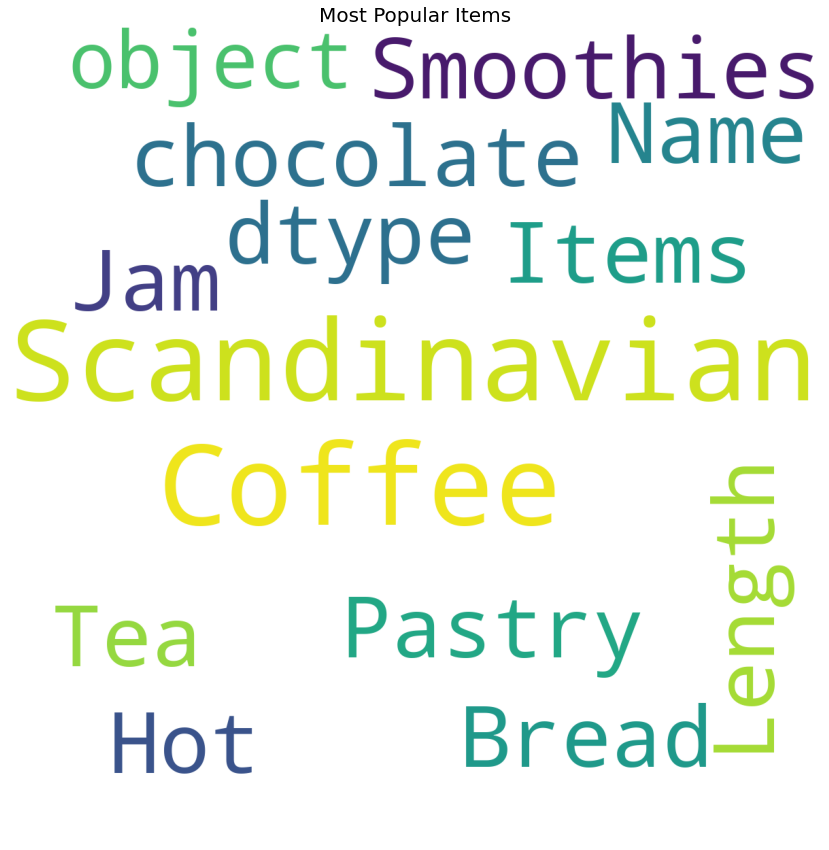

In [ ]:

# Using WordCloud for plotting
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df['Items']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

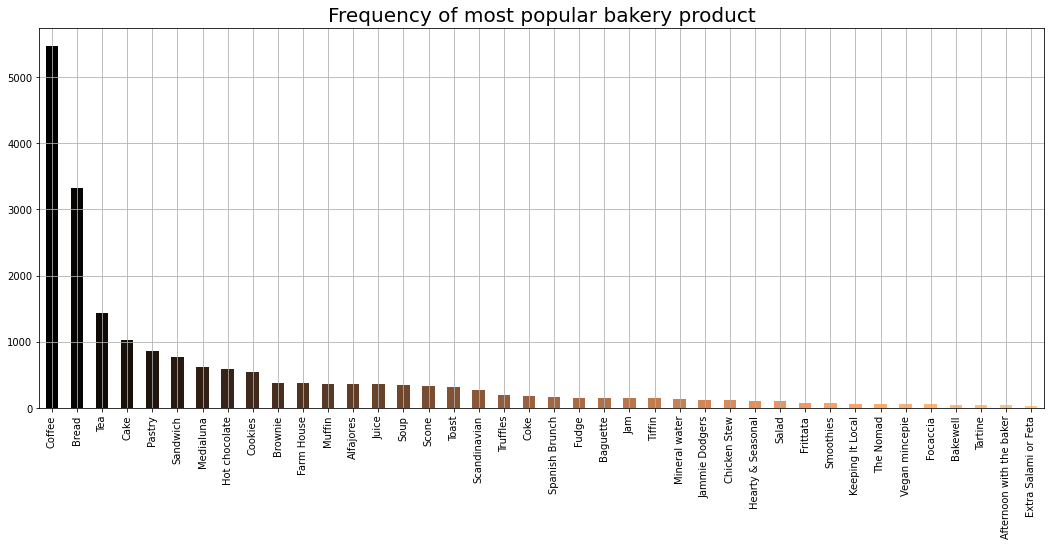

In [ ]:
# Frequency of most popular items in the bakery
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['Items'].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of most popular bakery product', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

#Part A: Applying apriori

In [ ]:
df.shape

(20507, 5)

In [ ]:
df =df.tail(5000)

In [ ]:
# df.shape
df.count()

TransactionNo    5000
Items            5000
DateTime         5000
Daypart          5000
DayType          5000
dtype: int64

In [ ]:
# distinct_date_count=len(pd.unique(df['DateTime']))
# len(pd.unique(df['TransactionNo']))
# distinct_item_count=len(pd.unique(df['Items']))
# print("distinct_date_count:",distinct_date_count)
# print("distinct_transaction:",distinct_transaction)
# print("distinct_item_count:",distinct_item_count)
df["Items"].unique()

array(['Pastry', 'Bread', 'Tea', 'Cake', 'Hot chocolate', 'Coffee',
       'Toast', 'Baguette', 'Cookies', 'Sandwich', 'Chicken Stew',
       'Muffin', 'Juice', 'Tiffin', 'Fudge', 'Scandinavian', 'Alfajores',
       'Mineral water', 'Eggs', 'Salad', 'Spanish Brunch', 'Duck egg',
       'Soup', 'Coke', 'Smoothies', 'Afternoon with the baker', 'Scone',
       'Truffles', 'Farm House', 'Brownie', 'Medialuna', 'Jammie Dodgers',
       'Extra Salami or Feta', 'The Nomad', 'Vegan Feast', 'Art Tray',
       'Granola', 'Jam', 'Drinking chocolate spoons ', 'Christmas common',
       'Vegan mincepie', 'Chocolates', 'Argentina Night',
       'Half slice Monster ', 'Gift voucher', 'Bakewell', 'Crisps',
       'Cherry me Dried fruit', 'Mortimer', 'Coffee granules ',
       'Nomad bag', 'Raw bars', 'Honey', 'Brioche and salami',
       'Tacos/Fajita', 'My-5 Fruit Shoot'], dtype=object)

In [ ]:
one_hot = pd.get_dummies(df['Items'])
df.drop('Items', inplace=True, axis=1)
df = df.join(one_hot)
df.head()

,TransactionNo,DateTime,Daypart,DayType,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Baguette,Bakewell,Bread,Brioche and salami,Brownie,Cake,Cherry me Dried fruit,Chicken Stew,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crisps,Drinking chocolate spoons,Duck egg,Eggs,Extra Salami or Feta,Farm House,Fudge,Gift voucher,Granola,Half slice Monster,Honey,Hot chocolate,Jam,Jammie Dodgers,Juice,Medialuna,Mineral water,Mortimer,Muffin,My-5 Fruit Shoot,Nomad bag,Pastry,Raw bars,Salad,Sandwich,Scandinavian,Scone,Smoothies,Soup,Spanish Brunch,Tacos/Fajita,Tea,The Nomad,Tiffin,Toast,Truffles,Vegan Feast,Vegan mincepie
15507,7411,2017-02-03 09:28:09,Morning,Weekday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15508,7412,2017-02-03 09:50:23,Morning,Weekday,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15509,7413,2017-02-03 09:58:07,Morning,Weekday,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15510,7414,2017-02-03 10:00:11,Morning,Weekday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
15511,7414,2017-02-03 10:00:11,Morning,Weekday,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
all_products =['Pastry', 'Bread', 'Tea', 'Cake', 'Hot chocolate', 'Coffee',
       'Toast', 'Baguette', 'Cookies', 'Sandwich', 'Chicken Stew',
       'Muffin', 'Juice', 'Tiffin', 'Fudge', 'Scandinavian', 'Alfajores',
       'Mineral water', 'Eggs', 'Salad', 'Spanish Brunch', 'Duck egg',
       'Soup', 'Coke', 'Smoothies', 'Afternoon with the baker', 'Scone',
       'Truffles', 'Farm House', 'Brownie', 'Medialuna', 'Jammie Dodgers',
       'Extra Salami or Feta', 'The Nomad', 'Vegan Feast', 'Art Tray',
       'Granola', 'Jam', 'Drinking chocolate spoons ', 'Christmas common',
       'Vegan mincepie', 'Chocolates', 'Argentina Night',
       'Half slice Monster ', 'Gift voucher', 'Bakewell', 'Crisps',
       'Cherry me Dried fruit', 'Mortimer', 'Coffee granules ',
       'Nomad bag', 'Raw bars', 'Honey', 'Brioche and salami',
       'Tacos/Fajita', 'My-5 Fruit Shoot']
records = df.groupby(["TransactionNo","DateTime"])[all_products[:]].apply(sum)
records = records.reset_index()[all_products]

In [ ]:
print(records)

      Pastry  Bread  Tea  ...  Brioche and salami  Tacos/Fajita  My-5 Fruit Shoot
0          1      0    0  ...                   0             0                 0
1          0      1    0  ...                   0             0                 0
2          0      1    0  ...                   0             0                 0
3          0      0    1  ...                   0             0                 0
4          0      1    0  ...                   0             0                 0
...      ...    ...  ...  ...                 ...           ...               ...
2225       0      1    0  ...                   0             0                 0
2226       0      0    1  ...                   0             0                 0
2227       0      0    1  ...                   0             1                 0
2228       1      0    0  ...                   0             0                 0
2229       0      0    0  ...                   0             0                 0

[2230 rows x 56

In [ ]:
def get_Pnames(x):
    for product in all_products:
        if x[product] > 0:
            x[product] = product
    return x

records = records.apply(get_Pnames, axis=1)
records.head()

,Pastry,Bread,Tea,Cake,Hot chocolate,Coffee,Toast,Baguette,Cookies,Sandwich,Chicken Stew,Muffin,Juice,Tiffin,Fudge,Scandinavian,Alfajores,Mineral water,Eggs,Salad,Spanish Brunch,Duck egg,Soup,Coke,Smoothies,Afternoon with the baker,Scone,Truffles,Farm House,Brownie,Medialuna,Jammie Dodgers,Extra Salami or Feta,The Nomad,Vegan Feast,Art Tray,Granola,Jam,Drinking chocolate spoons,Christmas common,Vegan mincepie,Chocolates,Argentina Night,Half slice Monster,Gift voucher,Bakewell,Crisps,Cherry me Dried fruit,Mortimer,Coffee granules,Nomad bag,Raw bars,Honey,Brioche and salami,Tacos/Fajita,My-5 Fruit Shoot
0,Pastry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,Tea,Cake,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Bread,0,0,Hot chocolate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
records.shape

(2230, 56)

In [ ]:
x = records.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x

In [ ]:
transactions

[['Pastry'],
 ['Bread'],
 ['Bread'],
 ['Tea', 'Cake'],
 ['Bread', 'Hot chocolate'],
 ['Cake', 'Coffee'],
 ['Pastry', 'Bread', 'Hot chocolate', 'Coffee'],
 ['Cake', 'Hot chocolate', 'Coffee'],
 ['Coffee', 'Toast'],
 ['Cake', 'Coffee'],
 ['Pastry', 'Bread'],
 ['Tea', 'Coffee'],
 ['Coffee', 'Baguette'],
 ['Pastry', 'Coffee'],
 ['Pastry', 'Bread'],
 ['Bread'],
 ['Coffee', 'Cookies'],
 ['Coffee', 'Sandwich'],
 ['Tea'],
 ['Bread'],
 ['Bread'],
 ['Tea'],
 ['Bread'],
 ['Coffee'],
 ['Chicken Stew'],
 ['Coffee', 'Sandwich'],
 ['Pastry', 'Bread', 'Hot chocolate', 'Coffee'],
 ['Bread', 'Coffee'],
 ['Bread', 'Coffee'],
 ['Pastry', 'Hot chocolate'],
 ['Hot chocolate', 'Coffee'],
 ['Tea', 'Coffee'],
 ['Tea'],
 ['Cake', 'Coffee'],
 ['Cake', 'Coffee'],
 ['Bread', 'Muffin'],
 ['Pastry', 'Tea'],
 ['Cake'],
 ['Bread'],
 ['Bread'],
 ['Bread'],
 ['Pastry', 'Bread'],
 ['Bread'],
 ['Coffee'],
 ['Coffee', 'Toast'],
 ['Coffee'],
 ['Coffee'],
 ['Cake', 'Coffee', 'Cookies', 'Juice'],
 ['Coffee'],
 ['Coffee', 'Tif

In [ ]:
rules = apriori(transactions,min_support=0.00030,min_confidance=0.05,min_lift=3,min_length=2,target="rules")
association_results = list(rules)

In [ ]:
association_results

[RelationRecord(items=frozenset({'Afternoon with the baker', 'Argentina Night'}), support=0.0008968609865470852, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Afternoon with the baker'}), items_add=frozenset({'Argentina Night'}), confidence=0.13333333333333333, lift=42.476190476190474), OrderedStatistic(items_base=frozenset({'Argentina Night'}), items_add=frozenset({'Afternoon with the baker'}), confidence=0.28571428571428575, lift=42.47619047619048)]),
 RelationRecord(items=frozenset({'Afternoon with the baker', 'Granola'}), support=0.0004484304932735426, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Afternoon with the baker'}), items_add=frozenset({'Granola'}), confidence=0.06666666666666667, lift=13.515151515151516), OrderedStatistic(items_base=frozenset({'Granola'}), items_add=frozenset({'Afternoon with the baker'}), confidence=0.09090909090909091, lift=13.515151515151516)]),
 RelationRecord(items=frozenset({'Brioche and salami', 'Alfajores'}), support=0

# Part B : Applying fpgrowth techniques

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,,-,/,5,A,B,C,D,E,F,G,H,J,M,N,P,R,S,T,V,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,r,s,t,u,v,w,x,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,True,True,False,True,False,False,True,True,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# %%time


# fpgrowth(df, min_support=0.5, use_colnames=True)
transactions
# rules[0] --> rules[1], confidence = rules[2]
# freqItemSet, rules = fpgrowth(transactions, minSup=0.5, minConf=0.5)

[['Pastry'],
 ['Bread'],
 ['Bread'],
 ['Tea', 'Cake'],
 ['Bread', 'Hot chocolate'],
 ['Cake', 'Coffee'],
 ['Pastry', 'Bread', 'Hot chocolate', 'Coffee'],
 ['Cake', 'Hot chocolate', 'Coffee'],
 ['Coffee', 'Toast'],
 ['Cake', 'Coffee'],
 ['Pastry', 'Bread'],
 ['Tea', 'Coffee'],
 ['Coffee', 'Baguette'],
 ['Pastry', 'Coffee'],
 ['Pastry', 'Bread'],
 ['Bread'],
 ['Coffee', 'Cookies'],
 ['Coffee', 'Sandwich'],
 ['Tea'],
 ['Bread'],
 ['Bread'],
 ['Tea'],
 ['Bread'],
 ['Coffee'],
 ['Chicken Stew'],
 ['Coffee', 'Sandwich'],
 ['Pastry', 'Bread', 'Hot chocolate', 'Coffee'],
 ['Bread', 'Coffee'],
 ['Bread', 'Coffee'],
 ['Pastry', 'Hot chocolate'],
 ['Hot chocolate', 'Coffee'],
 ['Tea', 'Coffee'],
 ['Tea'],
 ['Cake', 'Coffee'],
 ['Cake', 'Coffee'],
 ['Bread', 'Muffin'],
 ['Pastry', 'Tea'],
 ['Cake'],
 ['Bread'],
 ['Bread'],
 ['Bread'],
 ['Pastry', 'Bread'],
 ['Bread'],
 ['Coffee'],
 ['Coffee', 'Toast'],
 ['Coffee'],
 ['Coffee'],
 ['Cake', 'Coffee', 'Cookies', 'Juice'],
 ['Coffee'],
 ['Coffee', 'Tif

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
items = (df_fb['Items'].unique())
items
# fpgrowth(df, min_support=0.5, use_colnames=True)

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [ ]:
encoded_vals = []
for index, row in df_fb.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [ ]:
freq_items = fpgrowth(ohe_df, min_support=0.02, use_colnames=True)
freq_items.head()

,support,itemsets
0,0.162140,(Bread)
1,0.028771,(Hot chocolate)
2,0.026332,(Cookies)
3,0.266787,(Coffee)
4,0.041742,(Pastry)


## References▶
* https://medium.com/edureka/apriori-algorithm-d7cc648d4f1e
* http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/

Thank You.